In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import textwrap
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import pearsonr

mpl.style.use('toby')

## Get data

In [2]:
group_df = pd.read_csv('../data/all_data_long.csv')
group_df_wide = pd.read_csv('../data/all_data_wide.csv')
group_df = group_df[group_df['phase'] == 'T1']

## Predictors of protective behaviour

### Split data into discovery and validation sets

In [3]:
idx = range(len(group_df_wide))
discovery_idx, validation_idx = train_test_split(idx, random_state=9283)

group_df_wide_discovery = group_df_wide.iloc[discovery_idx]
group_df_wide_validation = group_df_wide.iloc[validation_idx]

### Scale the data

In [4]:
group_df_wide_discovery[[i for i in group_df_wide_validation.columns if 'q' in i]] = scale(group_df_wide_discovery[[i for i in group_df_wide_validation.columns if 'q' in i]])
group_df_wide_discovery['age_scaled'] = scale(group_df_wide_discovery['age'].values)
group_df_wide_validation[[i for i in group_df_wide_validation.columns if 'q' in i]] = scale(group_df_wide_validation[[i for i in group_df_wide_validation.columns if 'q' in i]])
group_df_wide_validation['age_scaled'] = scale(group_df_wide_validation['age'].values)

C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Toby\Anaconda2\envs\mne\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

### Discovery data

#### Create models

In [5]:
mod_handwashing_discovery = smf.ols(formula='q29 ~ age_scaled + q1 + + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10', data=group_df_wide_discovery)
mod_distancing_discovery = smf.ols(formula='q30 ~ age_scaled + q1 + + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10', data=group_df_wide_discovery)
res_handwashing_discovery = mod_handwashing_discovery.fit()
res_distancing_discovery = mod_distancing_discovery.fit()

#### Hand-washing results

In [6]:
res_handwashing_discovery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    q29   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.73
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.12e-23
Time:                        17:26:02   Log-Likelihood:                -1582.4
No. Observations:                1164   AIC:                             3189.
Df Residuals:                    1152   BIC:                             3250.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0020      0.028      0.071      0.943      -0.052       0.056
age_scaled     0.0325      0.029      1.113      0.266      -0.025       0.090
q1             0.1680      0.041      4.137      0.000       0.088       0.248
q2            -0.0298      0.033     -0.903      0.367      -0.095       0.035
q3             0.0234      0.032      0.740      0.460      -0.039       0.086
q4             0.0826      0.033      2.504      0.012       0.018       0.147
q5            -0.0080      0.041     -0.194      0.846      -0.089       0.073
q6             0.1208      0.050      2.413      0.016       0.023       0.219
q7             0.0021      0.054      0.038      0.970      -0.105       0.109
q8            -0.0059      0.050     -0.119      0.906      -0.104       0.092
q9             0.0544      0.030      1.793      0.073      -0.005       0.114
q10            0.0433      0.034      1.261      0.208      -0.024       0.111
==============================================================================
Omnibus:                      125.155   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.553
Skew:                          -0.924   Prob(JB):                     6.82e-37
Kurtosis:                       3.132   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Social distancing results

In [7]:
res_distancing_discovery.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    q30   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     16.26
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.08e-30
Time:                        17:26:03   Log-Likelihood:                -1570.3
No. Observations:                1164   AIC:                             3165.
Df Residuals:                    1152   BIC:                             3225.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.027     -0.012      0.990      -0.054       0.054
age_scaled     0.0228      0.029      0.788      0.431      -0.034       0.080
q1             0.2033      0.040      5.058      0.000       0.124       0.282
q2             0.0021      0.033      0.066      0.948      -0.062       0.066
q3             0.0413      0.031      1.319      0.187      -0.020       0.103
q4             0.1396      0.033      4.278      0.000       0.076       0.204
q5            -0.0138      0.041     -0.337      0.736      -0.094       0.066
q6             0.1598      0.050      3.225      0.001       0.063       0.257
q7            -0.0149      0.054     -0.277      0.782      -0.121       0.091
q8            -0.0514      0.049     -1.038      0.299      -0.148       0.046
q9            -0.0267      0.030     -0.889      0.374      -0.086       0.032
q10            0.0383      0.034      1.128      0.260      -0.028       0.105
==============================================================================
Omnibus:                      240.258   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.547
Skew:                          -0.196   Prob(JB):                     1.43e-12
Kurtosis:                       2.015   Cond. No.                         4.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Validation data

#### Create models

In [8]:
mod_handwashing_validation = smf.ols(formula='q29 ~ age_scaled + q1 + + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10', data=group_df_wide_validation)
mod_distancing_validation = smf.ols(formula='q30 ~ age_scaled + q1 + + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10', data=group_df_wide_validation)
res_handwashing_validation = mod_handwashing_validation.fit()
res_distancing_validation = mod_distancing_validation.fit()

#### Hand-washing results

In [9]:
res_handwashing_validation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    q29   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.553
Date:                Wed, 18 Mar 2020   Prob (F-statistic):            0.00399
Time:                        17:26:03   Log-Likelihood:                -537.30
No. Observations:                 388   AIC:                             1099.
Df Residuals:                     376   BIC:                             1146.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0081      0.050     -0.162      0.871      -0.106       0.090
age_scaled     0.0185      0.052      0.359      0.720      -0.083       0.120
q1             0.2043      0.070      2.931      0.004       0.067       0.341
q2            -0.0334      0.058     -0.573      0.567      -0.148       0.081
q3             0.0432      0.059      0.738      0.461      -0.072       0.158
q4             0.1335      0.056      2.394      0.017       0.024       0.243
q5            -0.1305      0.080     -1.639      0.102      -0.287       0.026
q6             0.0047      0.093      0.051      0.960      -0.178       0.187
q7             0.1004      0.096      1.045      0.297      -0.089       0.289
q8            -0.0521      0.087     -0.602      0.547      -0.222       0.118
q9             0.0669      0.053      1.252      0.211      -0.038       0.172
q10            0.0060      0.060      0.099      0.921      -0.112       0.124
==============================================================================
Omnibus:                       42.840   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.361
Skew:                          -0.925   Prob(JB):                     9.52e-13
Kurtosis:                       2.976   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Social distancing results

In [10]:
res_distancing_validation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    q30   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.493
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           3.80e-08
Time:                        17:26:03   Log-Likelihood:                -522.53
No. Observations:                 388   AIC:                             1069.
Df Residuals:                     376   BIC:                             1117.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0108      0.048      0.225      0.822      -0.084       0.105
age_scaled     0.0123      0.050      0.248      0.804      -0.085       0.110
q1             0.1710      0.067      2.548      0.011       0.039       0.303
q2             0.0280      0.056      0.499      0.618      -0.082       0.138
q3             0.1155      0.056      2.050      0.041       0.005       0.226
q4             0.1075      0.054      2.003      0.046       0.002       0.213
q5            -0.0151      0.077     -0.197      0.844      -0.166       0.136
q6             0.1255      0.089      1.407      0.160      -0.050       0.301
q7             0.1053      0.092      1.138      0.256      -0.077       0.287
q8            -0.1469      0.083     -1.763      0.079      -0.311       0.017
q9            -0.0146      0.051     -0.283      0.777      -0.116       0.087
q10            0.0567      0.058      0.981      0.327      -0.057       0.170
==============================================================================
Omnibus:                      104.066   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.505
Skew:                          -0.292   Prob(JB):                     7.87e-06
Kurtosis:                       1.945   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the results

In [11]:
risk_perception_qs =  group_df[group_df['q_category'] == 'Risk perception']['prompt'].unique()

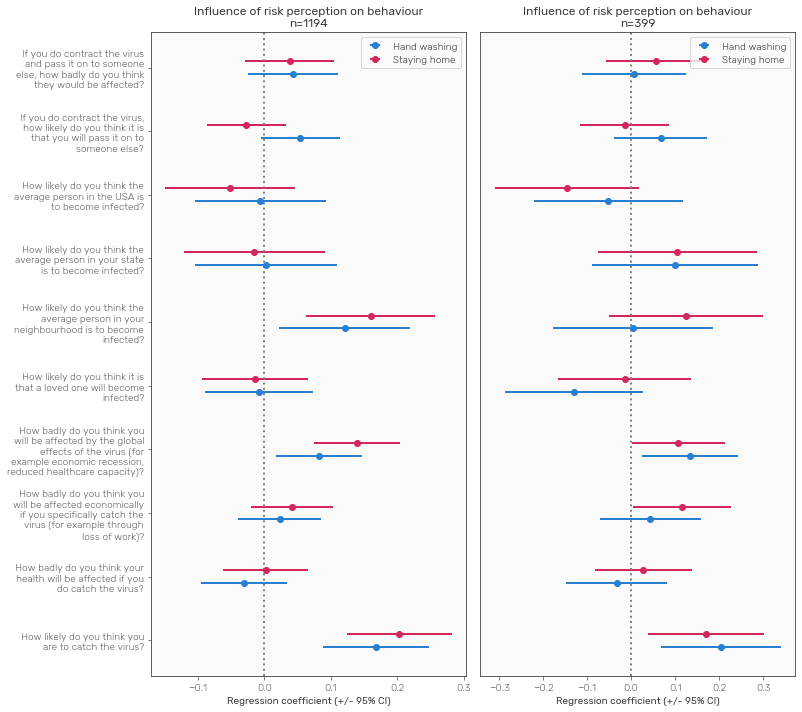

In [12]:
# plt.scatter()
import numpy as np
f, ax = plt.subplots(1, 2, figsize=(14, 10))

# DISCOVERY
ax[0].axvline(0, linestyle=':', color='gray', linewidth=2)

# Points and error bars
ax[0].errorbar(y=np.arange(len(res_handwashing_discovery.params[2:])) - 0.1, x=res_handwashing_discovery.params[2:], 
             xerr=np.abs(res_handwashing_discovery.conf_int().values[2:, :] - res_handwashing_discovery.params[2:, np.newaxis]).T, 
             color='#267fd3', linewidth=2, fmt='o', label='Hand washing')

ax[0].errorbar(y=np.arange(len(res_distancing_discovery.params[2:])) + 0.1, x=res_distancing_discovery.params[2:], 
             xerr=np.abs(res_distancing_discovery.conf_int().values[2:, :] - res_distancing_discovery.params[2:, np.newaxis]).T, 
             color='#d3265a', linewidth=2, fmt='o', label='Staying home')

# Labels
ax[0].set_yticks(range(len(risk_perception_qs)))
ax[0].set_yticklabels(['\n'.join(textwrap.wrap(q, 30, break_long_words=False)) for q in risk_perception_qs])

# Titles etc
ax[0].set_title("Influence of risk perception on behaviour\nn={0}".format(len(group_df_wide_discovery)))
ax[0].set_xlabel('Regression coefficient (+/- 95% CI)')
ax[0].legend()

# DISCOVERY
ax[1].axvline(0, linestyle=':', color='gray', linewidth=2)

# Points and error bars
ax[1].errorbar(y=np.arange(len(res_handwashing_validation.params[2:])) - 0.1, x=res_handwashing_validation.params[2:], 
             xerr=np.abs(res_handwashing_validation.conf_int().values[2:, :] - res_handwashing_validation.params[2:, np.newaxis]).T, 
             color='#267fd3', linewidth=2, fmt='o', label='Hand washing')

ax[1].errorbar(y=np.arange(len(res_distancing_validation.params[2:])) + 0.1, x=res_distancing_validation.params[2:], 
             xerr=np.abs(res_distancing_validation.conf_int().values[2:, :] - res_distancing_validation.params[2:, np.newaxis]).T, 
             color='#d3265a', linewidth=2, fmt='o', label='Staying home')

# Labels
ax[1].set_yticks([])

# Titles etc
ax[1].set_title("Influence of risk perception on behaviour\nn={0}".format(len(group_df_wide_validation)))
ax[1].set_xlabel('Regression coefficient (+/- 95% CI)')
ax[1].legend()

plt.tight_layout()

plt.gcf().subplots_adjust(left=0.35)

plt.savefig('../figures/risk_behaviour_regression.png', dpi=100)
plt.savefig('../figures/risk_behaviour_regression.svg')

## Difference in severity of effects between self and other - effect of age

In [13]:
group_df_wide['q10mq2'] = group_df_wide['q10'] - group_df_wide['q2']
group_df_wide = group_df_wide[~group_df_wide['q10mq2'].isnull()]

### Plot the relationship with age

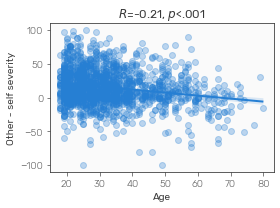

In [14]:
f, ax = plt.subplots(1, 1, figsize=(4, 3))

labels = ['Health']


r, p = pearsonr(group_df_wide.loc[~group_df_wide['age'].isnull(), 'age'], group_df_wide.loc[~group_df_wide['age'].isnull(), 'q10mq2'])
sns.regplot(group_df_wide.loc[~group_df_wide['age'].isnull(), 'age'], group_df_wide.loc[~group_df_wide['age'].isnull(), 'q10mq2'], 
            ax=ax, color='#267fd3', scatter_kws={'alpha':0.3}, line_kws={'linewidth': 2})
rounded_p = np.round(p / 3, 2)
if rounded_p == 0:
    p_string = '<.001'
else:
    p_string = '={0}'.format(rounded_p)
ax.set_title('$R$={0}, $p${1}'.format(np.round(r, 2), p_string))
ax.set_ylabel('Other - self severity')
ax.set_xlabel('Age')
    
plt.tight_layout()

### Linear regression

The plot and correlation above suggest a relationship with age, but we can check whether there is a still a bias after accounting for age by checking the intercept of a GLM.

In [15]:
mod = smf.ols(formula='q10mq2 ~ age', data=group_df_wide)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 q10mq2   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     69.39
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           1.75e-16
Time:                        17:26:06   Log-Likelihood:                -7257.8
No. Observations:                1552   AIC:                         1.452e+04
Df Residuals:                    1550   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.6828      1.888     15.720      0.000      25.979      33.386
age           -0.4456      0.053     -8.330      0.000      -0.551      -0.341
==============================================================================
Omnibus:                       26.315   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.442
Skew:                           0.101   Prob(JB):                     1.36e-10
Kurtosis:                       3.814   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

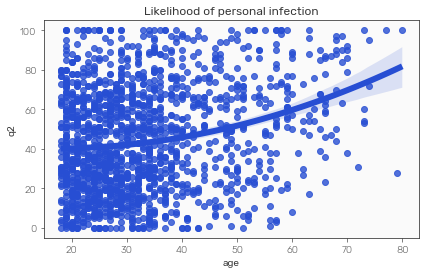

In [23]:
sns.regplot(group_df_wide['age'], group_df_wide['q2'], order=2)
plt.title('Likelihood of personal infection')
plt.savefig('../figures/age_personal_severity.png', dpi=200)